# Numerical Python

<center>![xkcd](xkcd.png "Python")https://xkcd.com/353</center>

## Contents

* A first taste of NumPy
* Creating arrays
* Indexing/slicing arrays
* Random numbers
* Structured arrays
* Performance considerations
* Linear algebra
* Plotting

## More info

* Scientific Computing Tools for Python 
  (http://www.scipy.org)
* Scipy Lecture Notes (http://scipy-lectures.org)
* The NumPy quickstart (https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)
* The SciPy tutorial (http://docs.scipy.org/doc/scipy/reference/tutorial/)

## Numerical Python (NumPy)

* The NumPy module enables efficient numerical computing in Python

In [1]:
# Needed for Jupyter
%matplotlib inline 

In [2]:
import numpy as np

* Offers efficient arrays (contiguous storage) with associated array operations 
* Written in C and Fortran
* Today NumPy is the quasi-standard. Previous alternatives: `numeric` from the mid 90s, `numarray` from about 2000, NumPy from 2006

## A taste of NumPy: Fit a line through a set of (x, y) data points

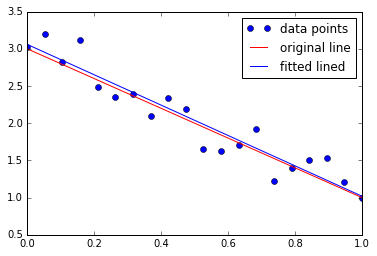

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create the x and y datapoints
n = 20                                  
x = np.linspace(0.0, 1.0, n)               # coordinates
y_line = -2*x + 3                       
y = y_line + np.random.normal(0, 0.25, n)  # data points with noise

# create and solve least squares system:
A = np.array([x, np.ones(n)])
A = A.transpose()
result = np.linalg.lstsq(A, y)

# result is a 4-tuple, the solution (a,b) is the 1st entry:
a, b = result[0]                        # 

# plot the result
plt.plot(x, y, 'o', label='data points')
plt.plot(x, y_line, 'r', label='original line')
plt.plot(x, a*x + b, 'b', label='fitted lined')

plt.legend()
plt.savefig('myplot.pdf')
plt.show()

In [4]:
print("a = {} (should be -2)".format(a))
print("b = {} (should be +3)".format(b))

a = -2.0209870225433497 (should be -2)
b = 3.0600397707060005 (should be +3)


## The example, step by step

Importing the `numpy` module (abbreviated as `np` for simple use):

In [4]:
import numpy as np

Create an equivally distributed array with x coordinates:

In [5]:
# Create the x and y datapoints
n = 20                                  
x = np.linspace(0.0, 1.0, n)               # coordinates
print(x)

[ 0.          0.05263158  0.10526316  0.15789474  0.21052632  0.26315789
  0.31578947  0.36842105  0.42105263  0.47368421  0.52631579  0.57894737
  0.63157895  0.68421053  0.73684211  0.78947368  0.84210526  0.89473684
  0.94736842  1.        ]


Generate the y data points and add noise using `numpy`s elementwise operations:

In [6]:
y_line = -2*x + 3
y = y_line + np.random.normal(0, 0.25, n)  # data points with noise
print(y)

[ 3.41323309  2.53840409  2.83165354  2.69594685  2.96334241  2.49200671
  2.08493867  2.30438273  2.07195979  2.05872652  2.17318903  1.58909332
  1.48332543  1.88105551  1.77199331  1.69143052  1.34438482  0.79714515
  0.3883802   1.52875545]


## The example, step by step

Set up a least squares problem and solve it with the `numpy.linalg.lstsq` function:

In [8]:
A = np.array([x, np.ones(n)])
A = A.transpose()
result = np.linalg.lstsq(A, y)

a, b = result[0]

Now:
* `a` contains the steepness (gradient) of the line.
* `b` contains the offset of the line at `x=0`.

Our line approximate is therefore:
```python
 y = a*x + b
 ```

Use the `matplotlib` library to plot the result:

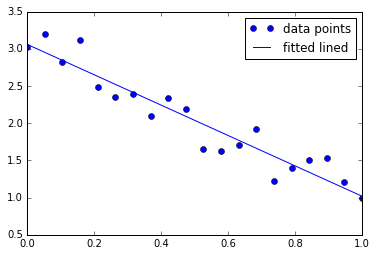

In [12]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o', label='data points')
plt.plot(x, a*x + b, 'b', label='fitted lined')
plt.legend()
plt.show()

# Numpy arrays


The most basic array type that NumPy provides is `ndarray`. These are N-dimensional homogenous collections of "items" of the same type.

```python
np.array([5., 10., 11.])
np.array(["a", "b", "c"])
```

**Remember**:

* Arrays have a fixed size.
* Arrays have one associated data type. 
* All elements in the array are of that same type. 

## Creating NumPy arrays

Numpy provides convience functions for creating commonly used arrays:

In [13]:
n = 5
np.zeros(n)

array([ 0.,  0.,  0.,  0.,  0.])

In [14]:
np.ones(n)      

array([ 1.,  1.,  1.,  1.,  1.])

In [15]:
np.empty(n)             # uninitialised array. Might contain arbitrary data

array([ 0.,  0.,  0.,  0.,  0.])

## Array with a sequence of numbers

`linspace(a, b, n)` generates `n` uniformly spaced
coordinates, starting with `a` and ending with `b`

In [16]:
np.linspace(-3, 2, 5, endpoint=True)

array([-3.  , -1.75, -0.5 ,  0.75,  2.  ])

Use `endpoint=False` to exclude the last point. A equivalent but more compact syntax is:

In [17]:
np.r_[-3:2:5j] 

array([-3.  , -1.75, -0.5 ,  0.75,  2.  ])

`arange` is the numpy equivalent of `range`

In [18]:
np.arange(-5, 5, 2, float)   # 5 is not included!

array([-5., -3., -1.,  1.,  3.])

## Warning: arange is dangerous

`arange`'s upper limit may or may not be included, due to round-off errors!

In [19]:
np.arange(8.2, 8.35, 0.05) # OK

array([ 8.2 ,  8.25,  8.3 ,  8.35])

In [20]:
np.arange(8.2, 8.4, 0.05)  # Not OK!

array([ 8.2 ,  8.25,  8.3 ,  8.35,  8.4 ])

**Reason**: An accumulated round-off error in the second case:

In [21]:
 float(repr(8.2 + 3*0.05))

8.35

In [22]:
float(repr(8.2 + 4*0.05))

8.399999999999999

# Array attributes

## Important array attributes

Given an array `a`, you have access to some useful attributes:

|Attribute|Description|
|--|-------------------------------|
|*a.data* |Buffer to raw data|
|*a.dtype*|Type information of data|
|*a.ndim* |Number of dimensions|
|*a.shape*|Tuple representing rank of array in each direction|
|*a.size* |Total number of elements|
|*a.nbytes* |Total number of bytes allocated for array|

## dtypes: the type of the arrays elements

Use the `dtype` argument to create an array of a specific type:
```python
np.zeros(3, dtype=np.int)       # integer datatype
np.ones(3, dtype=np.float32)    # single precision
np.array(3, dtype=np.complex)   # complex numbers
```
A full list of valid types can be found [here](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

**Example**: given an array a, make a new array `x` of same dimension and data type:

In [23]:
x = np.zeros(a.shape, a.dtype)

**By default**, numpy arrays will automatically select a suitable type to store the elements:

In [24]:
a = np.array([3.5, 4, "Hello world"])  
a.dtype # dtype are unicode strings with max 32 characters

dtype('<U32')

# More constructions of numpy arrays

## Python lists and numpy arrays

### From list to array
`array(list, [datatype])` generates an array from a `list`:

In [25]:
pl = [0, 1.2, 4, -9.1, 5, 8]
a = np.array(pl)

The type of the array is automatically determined:

In [26]:
np.array([1, 2, 3])      # array of integers
np.array([1.0, 2, 3])    # array of floats
np.array([1.0, 2, "a"])  # array of strings  oflength 32

array(['1.0', '2', 'a'], 
      dtype='<U32')

### From array to list

```python
alist = a.tolist()
```

## From "anything" to a NumPy array

Given an object `a` (of type `int`, `list`, `tuple`, `array`, ...),

In [27]:
np.asarray(a)

array([ 0. ,  1.2,  4. , -9.1,  5. ,  8. ])

converts `a` to a NumPy array if possible/necessary, tries to avoid copying

**Example**: Use `asarray` to allow flexible arguments in functions:

In [30]:
def myfunc(some_sequence):
    a = np.asarray(some_sequence)
    return 3*a - 5

myfunc([1,2,3])       # list argument
myfunc((-1,1))        # tuple argument
myfunc(np.zeros(10))  # array argument
myfunc(-4.5)          # float argument
myfunc(6)             # int argument

13

## Array initialization from a Python function

In [32]:
def myfunc(i, j):
     return (i+1)*(j+4-i)

# make 3x6 array where a[i,j] = myfunc(i,j):
np.fromfunction(myfunc, (3,6))

array([[  4.,   5.,   6.,   7.,   8.,   9.],
       [  6.,   8.,  10.,  12.,  14.,  16.],
       [  6.,   9.,  12.,  15.,  18.,  21.]])

# Higher-dimensional arrays

## Creating higher-dimensional arrays

Passing a tuple to an array constructer results in a higher-dimensional array:

In [33]:
np.zeros((2, 3, 3))     # 2*3*3 dim. array

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]])

A two-dimensional array from two one-dimensional Python lists:

In [34]:
x = [0, 0.5, 1]
y = [-6.1, -2, 1.2]  # Python lists
np.array([x, y])        # form array with x and y as rows

array([[ 0. ,  0.5,  1. ],
       [-6.1, -2. ,  1.2]])

Numpy allows up to 32 dimensions. You can retrieve the shape of an array with

In [35]:
a.shape

(6,)

## Changing array dimensions

Use the `shape` attribute to change the shape of the array *without copying* data:

In [36]:
a = np.array([0, 1.2, 4, -9.1, 5, 8])
a.shape = (2, 3)       # turn a into a 2x3 matrix
print(a)

[[ 0.   1.2  4. ]
 [-9.1  5.   8. ]]


The reshaped array points to the same data vector, i.e. no data is copied:

In [37]:
a[0,0] = -10
a.shape = (a.size,)   # turn a into a 1D - vector again
print(a)

[-10.    1.2   4.   -9.1   5.    8. ]


The `reshape` function has (nearly) same effect as setting a.shape:

In [38]:
a.reshape(2,3)    

array([[-10. ,   1.2,   4. ],
       [ -9.1,   5. ,   8. ]])

## NumPy data ordering

Numpy allows to store array in *C* or *FORTRAN* ordering:

<img src="array_ordering.svg">
**Note**: For one-dimensional arrays, the orders are equivalent.

The order can be chosen with the `order` flag:

In [40]:
a = np.asarray([[1, 2], [3, 4]], order='F')  # Fortran order
a.flags.f_contiguous                         # Check if Fortran ordering is used

True

## NumPy data ordering (2)

Numpy automatically converts the ordering when necessary:

In [41]:
A = np.array([[1, 2], [3, 4]], order="C")
B = np.array([[1, 2], [3, 4]], order="F")
print(A+B)

[[2 4]
 [6 8]]


Transposing a matrix is perfomed by swapping the ordering (without data copying):

In [42]:
A.transpose().flags.f_contiguous   

True

# Array indexing

## Basic indexing

The indicing syntax that we are know from `list`s also work for `array`s.

### Getting values
Slicing:
```python
a[1:4]           # Get 2nd to 4th element
```
Fancy indexing:
```python
a[[0, 2, 3]]     # Get entries 0, 2 and 3
```
**Important**: Slicing returns a *view* to the original array, i.e. no data is copied. Fancy indexing always returns a copy of the array.

### Setting values
```python
a[2:4] = -1      # set a[2] and a[3] equal to -1
a[-1]  = a[0]    # set last equal to first element
a[:]   = 0       # set all elements of a equal to 0
```

## Multi-dimensional indexing

Multi-dimensional indexing has the same syntax as `list`s:
```python
a = ones([2, 3]) # create a 2x3 matrix

a[1,2] = 10      # assignment to element (1,2)
a[1][2] = 10     # equivalent syntax (slower)
a[:,2]           # get third column
a[1,:]           # get second row
a[:,:] = 0       # set all elements of a equal to 0
```

## Example: extracting sub-matrices with slicing

Given this matrix:

In [43]:
a = np.linspace(0, 29, 30).reshape(5, 6)
print(a)

[[  0.   1.   2.   3.   4.   5.]
 [  6.   7.   8.   9.  10.  11.]
 [ 12.  13.  14.  15.  16.  17.]
 [ 18.  19.  20.  21.  22.  23.]
 [ 24.  25.  26.  27.  28.  29.]]


we can use slicing to get a *view* of a subset of this matrix:

In [44]:
a[1:3,::2]   # a[i,j] for i=1,2 and j=0,2,4

array([[  6.,   8.,  10.],
       [ 12.,  14.,  16.]])

In [45]:
a[::3,2::2]   # a[i,j] for i=0,3 and j=2,4

array([[  2.,   4.],
       [ 20.,  22.]])

## Slices refer the array data

Assigning to a sliced array will change the original array:

In [46]:
a = np.ones([3, 2])
b = a[2,:]      # get a view onto the 2nd row
b[0] = np.pi       # assigning to b is reflected in a! 
print(a)       

[[ 1.          1.        ]
 [ 1.          1.        ]
 [ 3.14159265  1.        ]]


To avoid referencing via slices (if needed) use `copy`:
```python
b = a[2,:].copy()  # b has its own vector structure
```

**Note**: This behaviour is different to Python `lists`, where `a[:]` makes always a copy

# Loops


## Loops over arrays using indices

```python
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        a[i,j] = (i+1)*(j+1)*(j+2)
        print('a[%d,%d]=%g ' % (i,j,a[i,j]),)
    print()  # empty line after each row
```


## Standard Python loops

A standard for loop iterates over the first index. 

**Example:** Looping over each element in a matrix:
```python
for row in a:
    for element in row:
         my_func(element)
```

**Alternative**: View array as one-dimensional and iterate over all elements:
```python
for e in a.ravel():
    my_func(element)
```
Use `ravel()` only when reading elements, for assigning it is better to use `shape` or `reshape`.

## Python loops with indices

Looping with access to the indices, can be done with `numpy.ndenumerate` (similar to `enumerate` from lists):
```python
for index, value in np.ndenumerate(a):
     print(index, value)
```
```bash
(0, 0) 2.0
(0, 1) 6.0
(0, 2) 12.0
(0, 3) 20.0
...
```

# Array computations

## Arithmetic operations

Arithmetic operations can be used with arrays:

In [47]:
b = 3*a - 1    # a is array, b becomes array

1. compute `t1 = 3*a`
2. compute `t2= t1 - 1`
3. set `b = t2`

## Array operations are much faster than element-wise operations

Let's compare the array versus element-wise operation on a 10 million large array.

#### Element wise implementation

In [48]:
import time  # module for measuring CPU time

a = np.linspace(0, 1, 1e+07)  # create a large array

t0 = time.clock()
b = np.zeros(a.size)
for i in range(a.size): 
    b[i] = 3*a[i] - 1
t1 = time.clock()
print('{:.3f} sec'.format(t1-t0))

6.209 sec


#### Implementation with array operations

In [49]:
t2 = time.clock()
b = 3*a -1
t3 = time.clock() 
print('{:.3f} sec'.format(t3-t2))

0.077 sec


or in other words, a speed-up of:

In [51]:
print((t1-t0)/(t3-t2))

80.60699237797758


## Numpy standard math functions can take array arguments

```python
# let b be an array
b = np.linspace(0, 100, 99)

c = np.sin(b)
c = np.arcsin(c)
c = np.sinh(b)
# same functions for the cos and tan families

c = b**2.5  # power function
c = np.log(b)
c = np.exp(b)
c = np.sqrt(b)
```

**Note**: The maths function from the math module (`from math import sin, ...`) also work on arrays, but are slower that the numpy implementations!

## Other useful array operations

```python
# a is an array
a.clip(min=3, max=12)  # clip elements (elementwise)
a.mean(); np.mean(a)      # mean value
a.var();  np.var(a)       # variance
a.std();  np.std(a)       # standard deviation
np.median(a)
np.cov(x,y)               # covariance
np.trapz(a)               # Trapezoidal integration
np.diff(a)                # finite differences (da/dx)

# more Matlab-like functions:
corrcoef, cumprod, diag, linalg.eig, eye, fliplr, flipud, max, min,
prod, ptp, rot90, squeeze, sum, linalg.svd, tri, tril, triu
```

# Vectorization

In [53]:
a = np.ones(10)
b = np.arange(10)

In [54]:
print(a)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [55]:
print(b)

[0 1 2 3 4 5 6 7 8 9]


## Non-vectorised implementation

In [59]:
out = np.ndarray(len(b))
for i in range(len(b)):
    out[i] = np.sin(b[i])

## Vectorised implementation

# Plotting

# Using matplotlib
Matplotlib is the most popular package in SciPy for creating publication quality figures. The easiest way to use matplotlib is to import the submodule "pyplot". This is heavily inspired by Matlab, and should therefore be easy to get used to if you already have experience with that.

In [2]:
# First line is only needed if you use matplotlib in a Notebook:
%matplotlib inline
import matplotlib.pyplot as plt

## Simple plotting
Plotting a simple series of equally spaced data points:

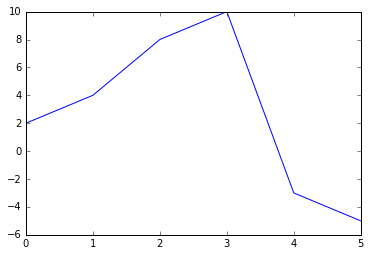

In [3]:
plt.plot([2, 4, 8, 10, -3, -5])
plt.show()   # This is not necessaryin a notebook, but is typically needed in scripts

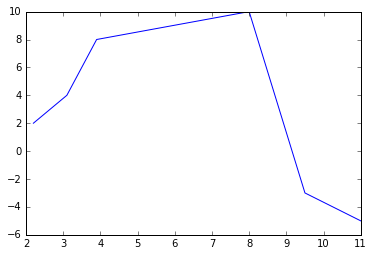

In [4]:
x = [2.2, 3.1, 3.9, 8.0, 9.5, 11.]
y = [2, 4, 8, 10, -3, -5]
plt.plot(x, y)

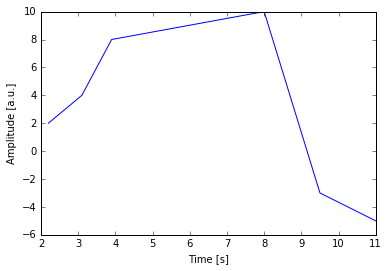

In [6]:
x = [2.2, 3.1, 3.9, 8.0, 9.5, 11.]
y = [2, 4, 8, 10, -3, -5]
plt.plot(x, y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [a.u.]')

Adding axis labels:

## Scatter plots:

[0, 6, 0, 20]

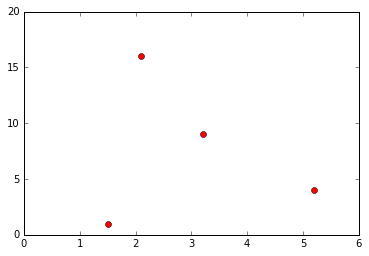

In [7]:
plt.plot([1.5, 5.2, 3.2, 2.1], [1 ,4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])

## Plotting a function of x
To start trying out plotting, let's first define a function to plot:
$$ f(x) = (x - 3) (x - 5) (x - 7) + 85 $$

In [8]:
def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85

Next, we plot this function on $  \ x \in [0, 10] $

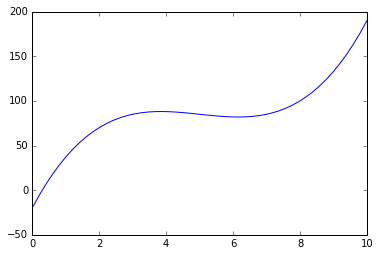

In [10]:
import numpy as np

# Calculate plot points:
x = np.linspace(0, 10)
y = func(x)

# Plot graph defined by x/y points
plt.plot(x, y)

To make it look like we want, we change the line to be red, with a linewidth of two, and y-axis cut-off at 0:

(0, 200.0)

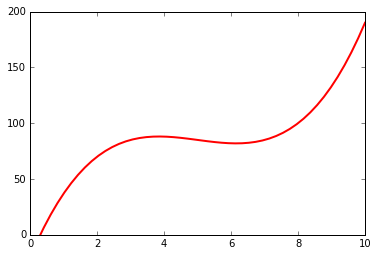

In [11]:
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(ymin=0)

A more complex showcase to play around with (taken from one of several matplotlib examples (http://matplotlib.org/gallery.html):

[]

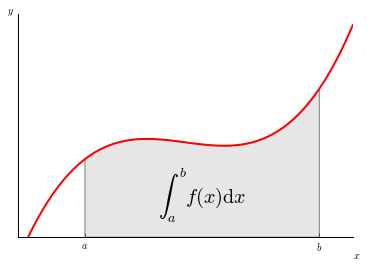

In [13]:
from matplotlib.patches import Polygon

a, b = 2, 9  # integral limits

fig, ax = plt.subplots()
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

## Combining two plots

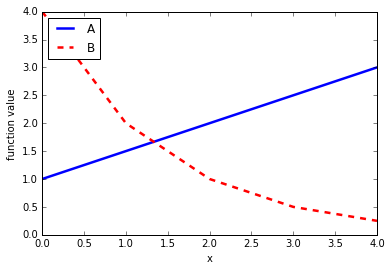

In [14]:
A = [1.0, 1.5, 2.0, 2.5, 3.0]
B = [4.0, 2.0, 1.0, 0.5, 0.25]

plt.plot(A, label="A", color="blue", linewidth=2.5, linestyle="-")    # Add labels for the legend
plt.plot(B, label="B", color="red", linewidth=2.5, linestyle="--")

plt.xlabel('x')   # Add labels for the axis
plt.ylabel('function value')   # Add labels for the axis

plt.legend(loc=2)

## Alternatives for plotting in Python

  * Matplotlib (curve plotting, 2D scalar and vector fields)

  * PyX (PostScript/TeX-like drawing)

  * Interface to Gnuplot

  * Interface to Vtk

  * Interface to OpenDX

  * Interface to IDL

  * Interface to Grace

  * Interface to Matlab

  * Interface to R

  * Interface to Blender

## Learning resources

* [Matplotlib tutorial in the scipy lectures](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)
* [Matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib) by Nicolas P. Rougier
* [Matplotlib Gallery](http://matplotlib.org/gallery.html)
<center>![matplotlib_gallery](matplotlib_gallery.png "Python")Matplotlib Gallery</center>

# A simple plot


Plotting one, or multiple sets of data is done with:

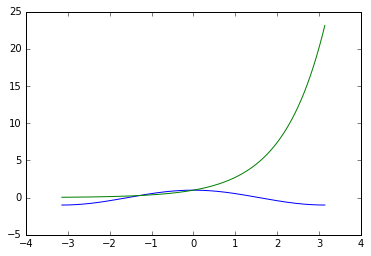

In [1]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
Y = np.cos(X)
Z = np.exp(X)

plt.plot(X, Y)
plt.plot(X, Z)

plt.show()

# Adjusting your plot


Typical adjustments:
* Change line color, thickness, type
* Change axis settings
* Add labels, legends
* ...

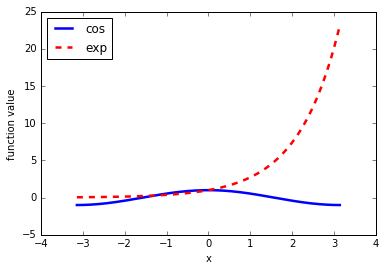

In [2]:
plt.plot(X, Y, label="cos", color="blue", linewidth=2.5, linestyle="-")    # Add labels for the legend
plt.plot(X, Z, label="exp", color="red", linewidth=2.5, linestyle="--")

plt.xlabel('x')   # Add labels for the axis
plt.ylabel('function value')   # Add labels for the axis

plt.legend(loc=2)
plt.show()

# Other types of plots

|Function name|Plot type|
|--|-------------------------------|
|*pyplot.scatter* |Scatter plot|
|*pyplot.bar* |Bar plot|
|*pyplot.counturf* |Contour plot|
|*pyplot.imshow* |Showing images (on grids)|
|*pyplot.pie* | Pie charts |
|*pyplot.plot_surface* | 3D charts |

## Example of a scatter plot

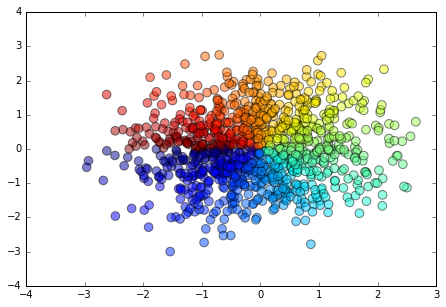

In [3]:
n = 1024
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
T = np.arctan2(Y, X)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.scatter(X, Y, s=75, c=T, alpha=.5)


plt.show()

## A final tip: Prettify your plot with `seaborn`

seaborn is a package for statistical data visualization. But it also sets nice(r) settings for matplotlib plots! 

Importing `seaborn` is sufficient to get the seaborn style plots:

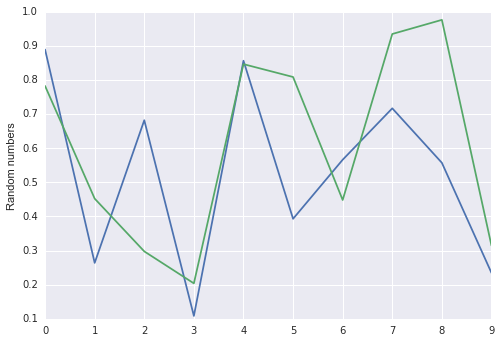

In [4]:
import seaborn

plt.plot(np.random.random(10))
plt.plot(np.random.random(10))
plt.ylabel('Random numbers')
plt.show()